In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import  ElasticNet
from sklearn.linear_model import  Ridge
from sklearn.model_selection import cross_val_score
import  statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import  Lasso
from sklearn.model_selection import GridSearchCV
import matplotlib
from sklearn.decomposition import  PCA
from sklearn.cluster import  KMeans



In [2]:
df = pd.read_csv('/Users/tianyangsun/Documents/Uob_Y3_S1/Machine_learning/exercises/pycharm_regression/housing.csv')
print ("number of rows and cols" + str(df.shape))

df.head()

df.isnull().sum()

df['total_bedrooms'].describe(), df['total_bedrooms'].mode()



number of rows and cols(20640, 10)


(count    20433.000000
 mean       537.870553
 std        421.385070
 min          1.000000
 25%        296.000000
 50%        435.000000
 75%        647.000000
 max       6445.000000
 Name: total_bedrooms, dtype: float64, 0    280.0
 dtype: float64)

In [3]:
# modify the column in the data and save it into mod_house.csv

modified_house = df
modified_house['total_bedrooms'].fillna(280)
# check is any value is mising in modified house
modified_house.isnull().sum()
# save the data to a new file
modified_house.to_csv("mod_house.csv", index = False)

# deal with outliers
#plt.figure(figsize=(10,4))




,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [17]:
# deal with outliers or b
#df['total_bedrooms'].apply(np.log)
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


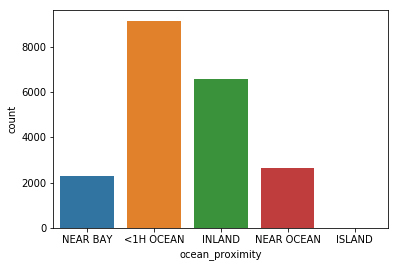

In [19]:
#inspection of ocean_related data
#plot the graph
sns.countplot(data = df, x='ocean_proximity')
# we need to turn the ocean proximity into numbers indicating categories

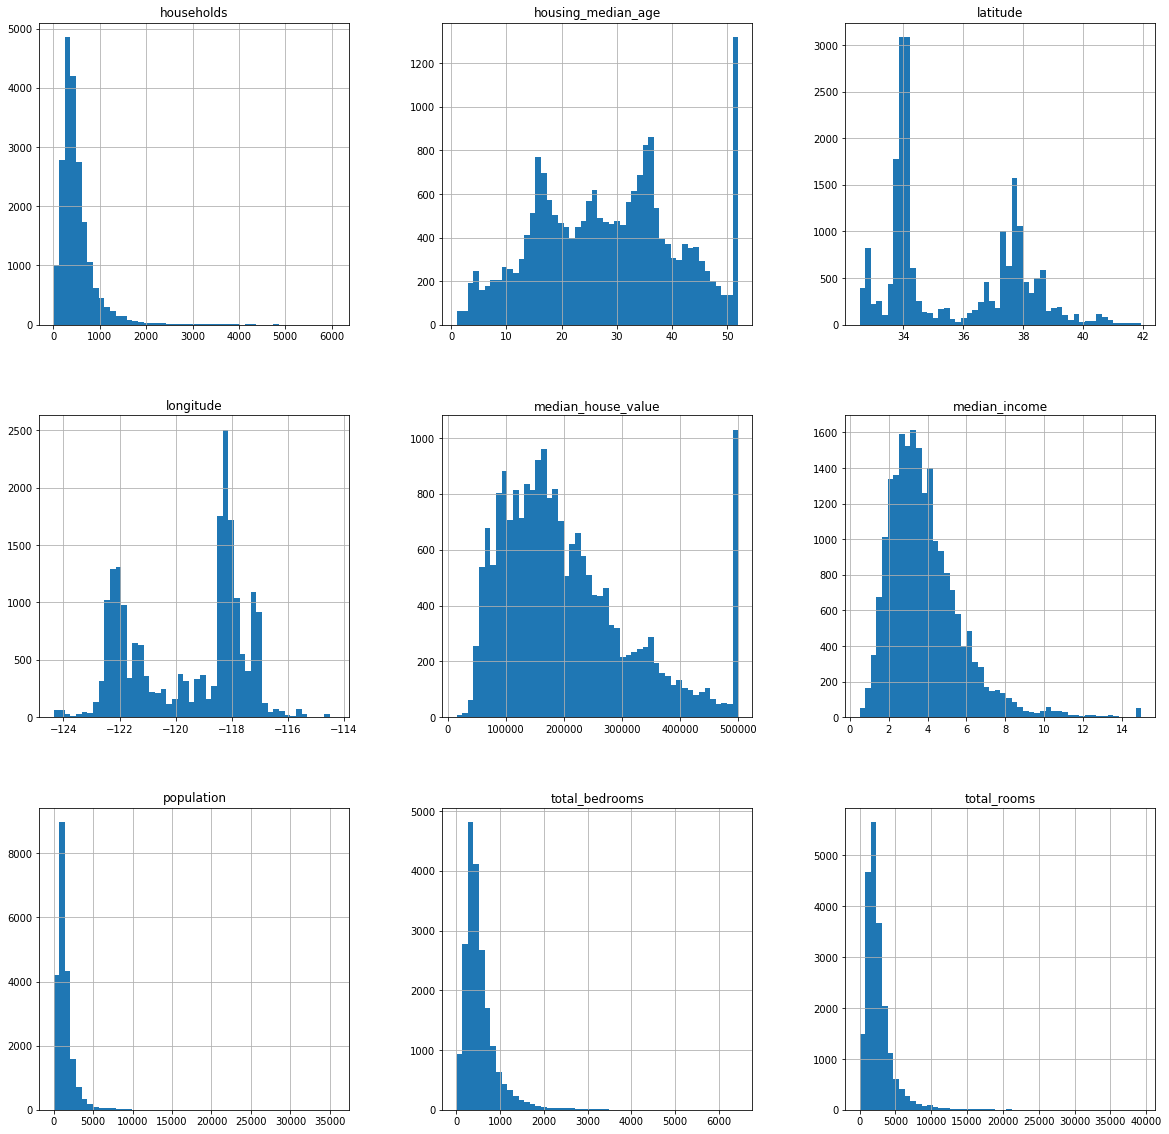

In [4]:
# visualization of each row
df.hist(bins=50, figsize=(20, 20))
plt.show()


In [5]:
# finding correlations and visualize the correlation
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


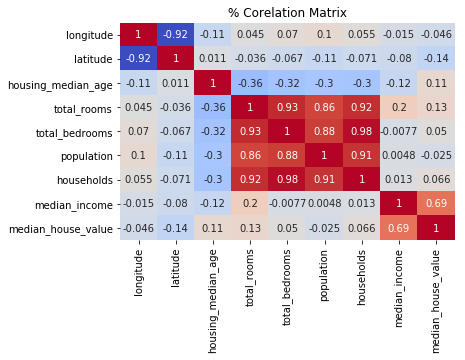

In [7]:
#visualizing the covariance matrix
sns.heatmap(cbar=False,annot=True,data=df.corr(),cmap='coolwarm')
plt.title('% Corelation Matrix')
plt.show()

In [8]:
# according to the cov_matrix, we can do the following feature engineering
df['num_of_bedrooms'] = df['total_bedrooms']/df['households'] # bedrooms per house
df['num_of_rooms'] = df['total_rooms'] / df['households'] # rooms per household
df['population_per_house'] = df['population'] / df['households'] # population per household

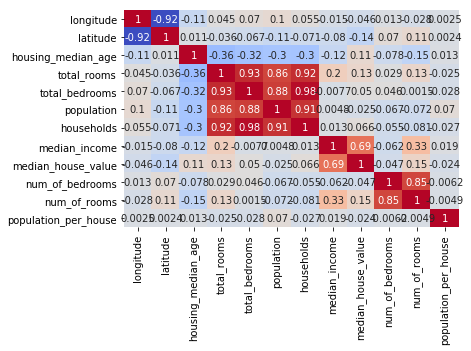

In [9]:
sns.heatmap(cbar=False,annot=True,data=df.corr(),cmap='coolwarm')

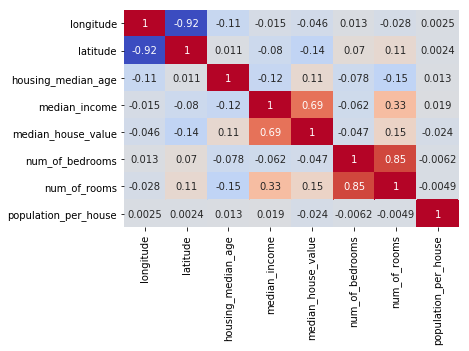

In [10]:
df.drop(['total_rooms', 'total_bedrooms', 'population', 'households'], axis = 1, inplace = True)
sns.heatmap(cbar=False,annot=True,data=df.corr(),cmap='coolwarm')